<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Module_02_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project
---



From 2020 to 2022, we have been severely affected by the COVID-19 pandemic. And if you would know a little about it, you would have heard about **SARS-CoV-2** (Severe Acute Respiratory Syndrome Coronavirus 2) which is the virus responsible for the COVID-19 disease.

A little biology might intrigue you further. This SARS-CoV-2 is a RNA virus and when this virus enters your body, it interacts with the ACE-2 receptor using its Spike protein. When this happens, it gets access to be able to multiply inside your body, ultimately resulting in you getting infected with the COVID-19 disease.

Before I explain you the details of the project and what you will be doing, let me first introduce you to what a virus genome is. Every living organism in this world has someting called a Nucleus which produces its characteristic genome sequence. Even your body has a genome and it will be very different from that of lets say a cat. Now, this SARS-CoV-2 virus also has its characteristic genome sequence and it is roughly of the length 29000 bases. A little more Class 9 biology lesson: Each genome is built up with just 4 characters called bases (A, T, G and C).

For this project, I will provide you with some SARS-CoV-2 genomes collected from infected people in India and you will use just the Visualization techniques you learnt in the module to analyze the genomes and infer the spread of the COVID-19 disease in the country.

685 genome sequences from India downloaded from GISAID (https://www.gisaid.org/) in early to mid 2020 have been provided to you in the _sequences.fasta_ file and some cleaned metadata regarding these sequences has been given in the _INDIA_685.csv_ file.


> Please download the required files from [here](https://drive.google.com/drive/folders/1rLMKfsEaJ3CordYxDlEbjssVwZVWIyyO?usp=sharing) and upload when asked.

In [ ]:
from google.colab import files

In [ ]:
# Upload Module2_ProjectFiles.zip file here by running this cell
from google.colab import files
uploaded = files.upload()
loc_ = list(uploaded.keys())[0]
!unzip -q "{loc_}"

Saving INDIA_685.csv to INDIA_685.csv
[INDIA_685.csv]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of INDIA_685.csv or
        INDIA_685.csv.zip, and cannot find INDIA_685.csv.ZIP, period.


In [ ]:
import pandas as pd

df = pd.read_csv('INDIA_685.csv')
display(df.head())

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,27/01/2020,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,31/01/2020,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


In [ ]:
!pip3 -q install biopython

import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.autonotebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.7 MB/s eta 0:00:00


/tmp/ipython-input-4048425673.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
data = pd.read_csv("INDIA_685.csv")
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,21/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [ ]:
!ls -R

.:
INDIA_685.csv  sample_data

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
from google.colab import files
import io
from Bio import SeqIO

# Upload the fasta file
uploaded = files.upload()

# Now, count the sequences
if uploaded:
    # Get the name of the uploaded file and its content
    fasta_file_name = list(uploaded.keys())[0]
    fasta_content = uploaded[fasta_file_name].decode('utf-8') # Decode bytes to string

    # Use io.StringIO to wrap the string content in a text-mode stream
    fasta_sequences = list(SeqIO.parse(io.StringIO(fasta_content), "fasta"))
    num_sequences = len(fasta_sequences)
    print("Number of sequences is:", num_sequences)

Saving sequences (2).fasta to sequences (2).fasta
Number of sequences is: 685


You might have heard in the news that the SARS-CoV-2 is mutating and might have heard the words Double Mutant, Delta Variant and so on. These are nothing but very slight differences in the genomes caused due to Mutations. Some of these mutations end up making the virus deadlier or more infectious.

Our goal here is to analyze these genomes and find the ones closer to one another (similar mutations in both) or distant (different profile of mutations). These mutations in turn help us to understand the spread of the Virus and the Demographics of it. Imagine a sequence from Italy has the same set of 10 random mutations as a sequence in India. We can then infer that the source of infection for both the people could be the same. This sort of analysis helps us analyze hotspots and predict if a large outbreak is about to happen.

We will try to look at these genome sequences and be able to cluster similar ones together and distant ones furhter away. In this project you will be using two methods to do this:

**1. k-mer based methods** <br>
**2. Mutation Profile based methods**

# kmer based methods

In bioinformatics, k-mers are substrings of length k contained within a biological sequence. A sequence of length L will have ```L-k+1 k-mers``` and ```4^k total possible k-mers```. Here we, will be using kmers of size 7. We will represent each genome in this kmer space. Basically a genome of size 30000 bases would have a total of 29994 7-mers.

**Now how do you use this information to cluster genome sequences?** <br>
We would be looking at the counts of different kmers in the genomes and the ones which have similar counts for different kmers should end up closer than the others.

For **k=7**, there are **16384** possible kmers. We will represent each genome sequence as a vector of size 16384 with each position scoring the frequency of the kmer corresponding to that position.

**But how do we find out the position in the array for a kmer?**<br>
We will be using a hash function to map each kmer to a position in the array (0 to 16383). Whenever that kmer will be observed in a sequence, the value at the corresponding position in the array would be increased by 1.

#### Hash function:

A: 0 <br>
G: 1<br>
T: 2<br>
C: 3<br>

Multiply the character value by ```4^(position of the character in the kmer)``` <br>
therefore, TAG would equal = (4^0 * 2) + (4^1 * 0) + (4^2 * 1) = 2 + 0 + 16 = 18

**Can you find out the hash value for CATCGAG?**

In [ ]:
def calc_score(examplesequence):
    base_map = {'A': 0, 'G': 1, 'T': 2, 'C': 3}
    score = sum(base_map.get(base.upper(), -1) * (4**i) for i, base in enumerate(examplesequence))
    return (any(base.upper() not in base_map for base in examplesequence), score)

print(calc_score("CATCGAG"))

(False, 4579)


So essentially we reduced a **29000 base sequence** into a **vector of size 16384**. Now we need to further reduce the dimensionality to 2 or 3 dimensions to be able to visualize it.

**But how dow we do that??**

We can use any of the methods taught to you in the Labs. But here I will explain how to do this using PCA. Then you will use the knowledge from Lab3 on t-SNE to do a similar analysis yourself.

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Use 2 components for visualization
pca_data = pca.fit_transform(big_matrix) # Fit and transform in one step

In [ ]:
# Generate the k-mer frequency matrix

k = 7
kmer_size = 4**k # Total possible kmers for k=7
big_matrix = np.zeros((num_sequences, kmer_size), dtype=np.int16)

base_map = {'A': 0, 'G': 1, 'T': 2, 'C': 3}

def kmer_to_index(kmer):
    """Calculates the index for a given k-mer using the hash function."""
    index = 0
    for i, base in enumerate(kmer):
        index += base_map.get(base.upper(), -1) * (4**i)
    return index

# Populate the big_matrix
for i, seq_record in tqdm(enumerate(fasta_sequences), total=num_sequences, desc="Processing sequences"):
    sequence = str(seq_record.seq)
    for j in range(len(sequence) - k + 1):
        kmer = sequence[j:j+k]
        # Check if kmer contains valid bases before calculating index
        if all(base.upper() in base_map for base in kmer):
            index = kmer_to_index(kmer)
            big_matrix[i, index] += 1

print("Shape of big_matrix:", big_matrix.shape)

Processing sequences:   0%|          | 0/685 [00:00<?, ?it/s]

Shape of big_matrix: (685, 16384)


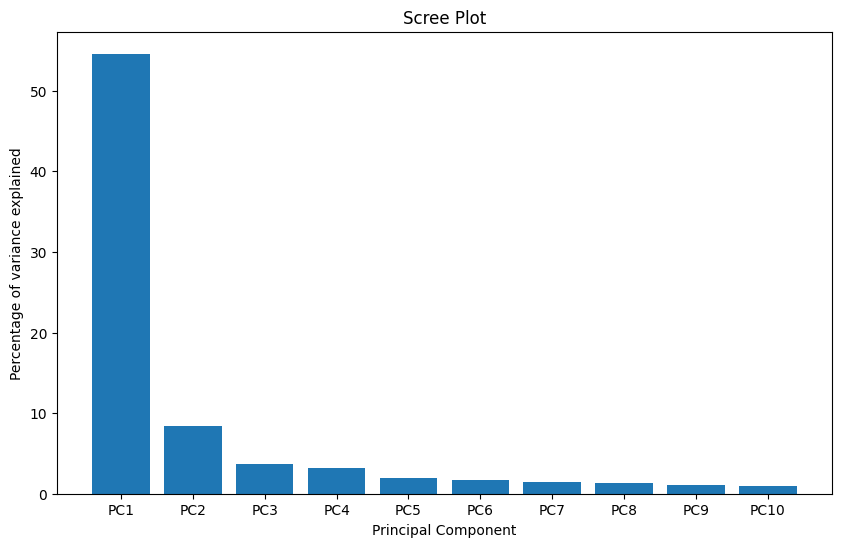

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_full = PCA(n_components=10)
pca_full.fit(big_matrix)

per_var = np.round(pca_full.explained_variance_ratio_* 100, decimals=1)
labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of variance explained")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

As you can see, the first principal component alone explains more than 50% of the variance in the dataset. To put this into context, more than **50% variance in 685 genomes of size 29000 bases could be explained with just one dimension**. This shows the amount of structure present in the dataset.

We will be now visualizing the first 2 principal components and plot the genomes according to the State they belonged to.

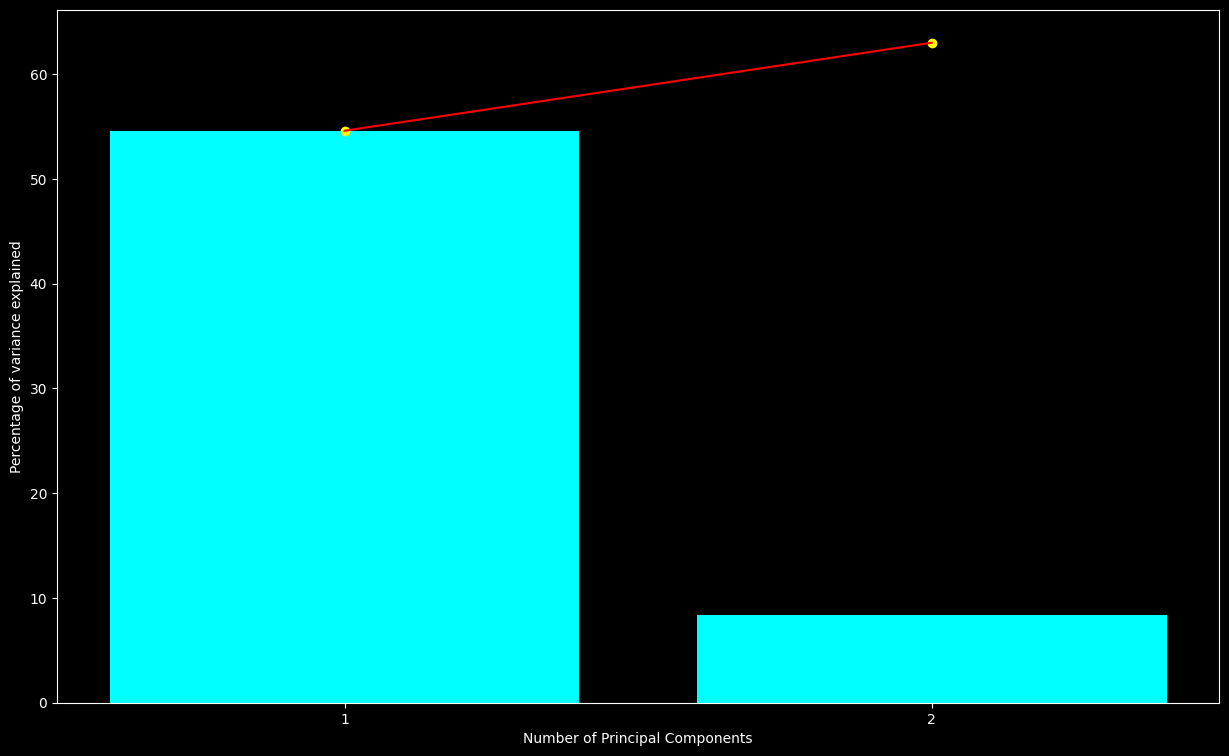

In [ ]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Create a DataFrame with PCA results and relevant metadata
final_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
final_df['State'] = data['State']
final_df['StrainID'] = data['StrainID']

# Generate the scatter plot
fig = px.scatter(final_df, x='PC1', y='PC2', color='State',
                 title='PCA of SARS-CoV-2 Genomes by State',
                 hover_data=['StrainID'])

fig.show(renderer="colab")

Even though the plot looks densely clustered, there are still a lot of obvious observations that you should be able to make.

### The first one, is that for some reason the Blue dots (Odisha) are scattered away from the big main cluster.

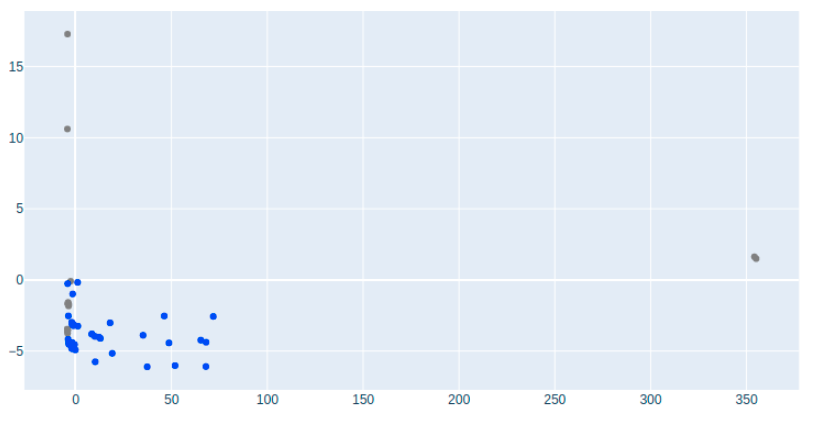

### Also, we can observe a secondary cluster away from the primary cluster. On inspecting, we can see that the sequences forming this cluster are primarily from Telangana (red), Delhi (magenta), and Tamil Nadu (green).

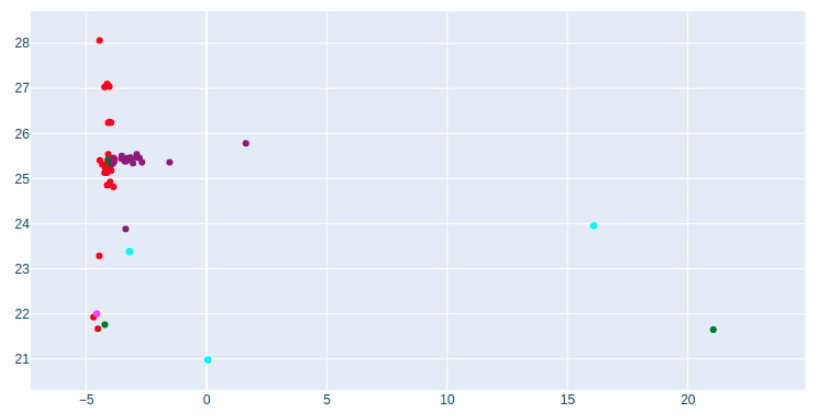

### The third less obvious observation is that within the main cluster, there is a dense cluster of sequences from Gujarat.

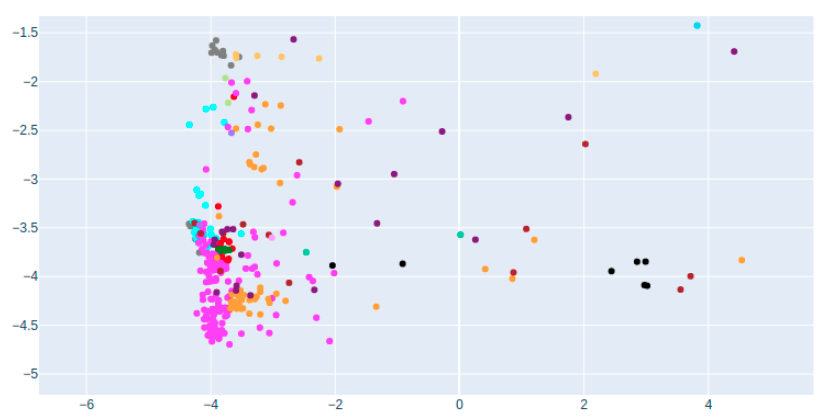

**t-SNE**

In [ ]:
from sklearn.manifold import TSNE
import numpy as np # Make sure numpy is imported

# Use these parameters
random_state = 42 # Changed random state
n_components = 2
perplexity = 50 # Changed perplexity
n_iter = 5000 # Changed number of iterations

####### Enter code below #######

model = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity, n_iter=n_iter)
tsne_data = model.fit_transform(np.array(big_matrix))

################################

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [ ]:
from sklearn.manifold import TSNE
import numpy as np # Make sure numpy is imported

# Use these parameters
random_state = 42 # Changed random state
n_components = 2
perplexity = 50 # Changed perplexity
max_iter = 5000 # Changed number of iterations and parameter name

####### Enter code below #######

model = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity, max_iter=max_iter)
tsne_data = model.fit_transform(np.array(big_matrix))

################################

In [ ]:
# Create a DataFrame with t-SNE results and relevant metadata
tsne_final_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_final_df['State'] = data['State']
tsne_final_df['StrainID'] = data['StrainID']

# Display the first few rows of the new DataFrame
display(tsne_final_df.head())

,TSNE1,TSNE2,State,StrainID
0,-8.984991,-6.491426,Kerala,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27
1,-8.840745,-6.563540,Kerala,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31
2,-8.781590,-7.026881,Stateless,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10
3,-8.384275,-6.955183,Stateless,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10
4,-8.368154,-7.033732,Stateless,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10


from matplotlib import pyplot as plt
_df_0['TSNE1'].plot(kind='hist', bins=20, title='TSNE1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TSNE2'].plot(kind='hist', bins=20, title='TSNE2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('StrainID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TSNE1', y='TSNE2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TSNE1']
  ys = series['TSNE2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('TSNE1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TSNE1')
_ = plt.ylabel('TSNE2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TSNE1']
  ys = series['TSNE2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('TSNE1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StrainID')):
  _plot_series(series, series_name, i)
  fig.legend(title='StrainID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TSNE1')
_ = plt.ylabel('TSNE2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TSNE1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TSNE1'}, axis=1)
              .sort_values('TSNE1', ascending=True))
  xs = counted['TSNE1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('TSNE1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TSNE1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TSNE1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TSNE1'}, axis=1)
              .sort_values('TSNE1', ascending=True))
  xs = counted['TSNE1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('TSNE1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StrainID')):
  _plot_series(series, series_name, i)
  fig.legend(title='StrainID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TSNE1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['TSNE1'].plot(kind='line', figsize=(8, 4), title='TSNE1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['TSNE2'].plot(kind='line', figsize=(8, 4), title='TSNE2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['StrainID'].value_counts()
    for x_label, grp in _df_11.groupby('State')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('State')
_ = plt.ylabel('StrainID')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='TSNE1', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['StrainID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='TSNE1', y='StrainID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='TSNE2', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['StrainID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='TSNE2', y='StrainID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import plotly.express as px

# Generate the scatter plot
fig = px.scatter(tsne_final_df, x='TSNE1', y='TSNE2', color='State',
                 title='t-SNE of SARS-CoV-2 Genomes by State',
                 hover_data=['StrainID'],
                 height=700, # Changed height
                 width=1100) # Changed width

fig.show(renderer="colab")

Does making the 3 observations become easier in this plot? Can you make any other new observations from this plot?

Make sure you tweak the parameters to find out if a certain different setting is allowing you to get a more interpretable plot.

# Mutation Profile based methods

If you would have noticed, there is a column called Nuc_muts (Nucleotide mutations) in the INDIA_685.csv file. These are the specific mutations for each sequence which I have precomputed for you using the first SARS-CoV-2 sequence from Wuhan, China (https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta) as the reference.

A mutation C453T in a sequence means that the original reference sequence from Wuhan had a C at position 453 whereas the sequence has a T at that position.

Now instead of using kmers for sequences, this time we will use the **presence/absence of all mutations** found in our dataset to represent the genomes.

In [ ]:
# Extract unique mutations
unique_mutations = set()
for mut_list_str in data['Nuc_muts']:
    # Safely evaluate the string representation of the list
    try:
        mut_list = eval(mut_list_str)
        for mut in mut_list:
            unique_mutations.add(mut.strip())
    except:
        # Handle cases where the string is not a valid list representation
        pass

mutations = list(unique_mutations)
print(f"Number of unique mutations: {len(mutations)}")

Number of unique mutations: 1279


So there are 1279 unique mutations in our sequences. We can now represent each genome as a ```vector of size 1279 where each position indicates the presence (1) or absence (0) of a specific mutation```.

In [ ]:
# Create a binary matrix for mutations
mutation_matrix = pd.DataFrame(0, index=data['StrainID'], columns=mutations)

for index, row in tqdm(data.iterrows(), total=len(data), desc="Generating mutation matrix"):
    strain_id = row['StrainID']
    # Safely evaluate the string representation of the list
    try:
        mut_list = eval(row['Nuc_muts'])
        for mut in mut_list:
            cleaned_mut = mut.strip()
            if cleaned_mut in mutations:
                mutation_matrix.loc[strain_id, cleaned_mut] = 1
    except:
        # Handle cases where the string is not a valid list representation
        pass

display(mutation_matrix.head())

Generating mutation matrix:   0%|          | 0/685 [00:00<?, ?it/s]

,T10472G,T13402G,G14181A,C16575T,T426C,C3768T,T19644C,G8571T,T7232G,T17486C,...,T224A,C19029T,C27612T,C23854T,A21550C,G28621T,T21581A,C26607T,G4076A,A22252T
StrainID,,,,,,,,,,,,,,,,,,,,,
hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

Performing PCA on this dataframe, we want to reduce the dimensionality of our genome sequences from 1279 to 2.

In [ ]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

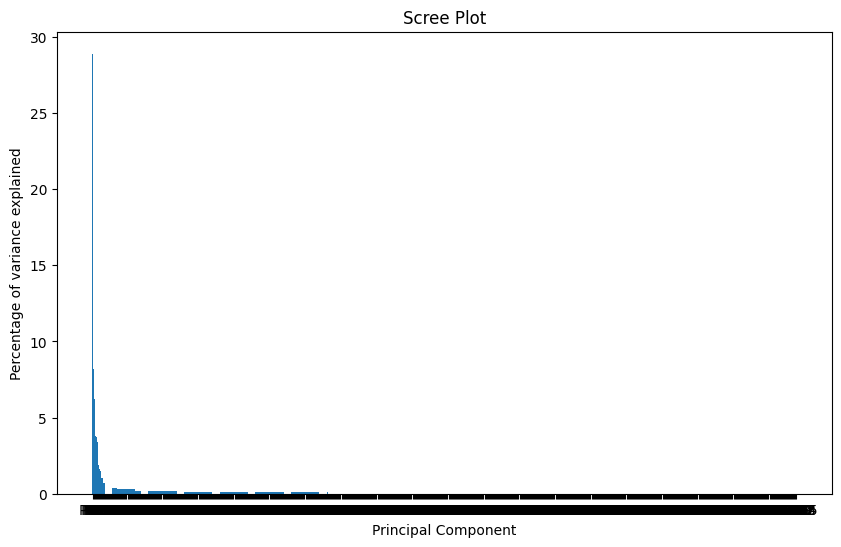

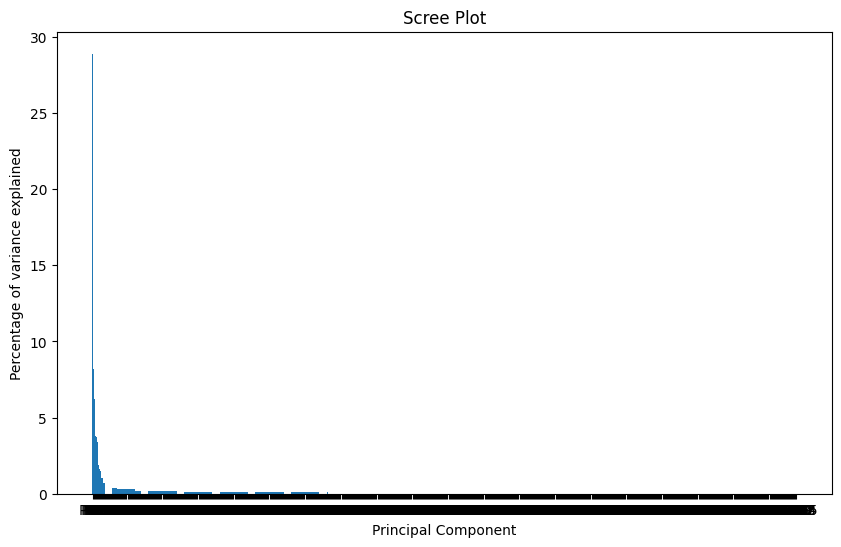

In [ ]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of variance explained")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

The first principal component should be able to capture close to 30% of the variance in the dataset.

In [ ]:
# Create a DataFrame with the first two PCA components and metadata
final_df = pd.DataFrame(data=pca_data[:, :2], columns=['PC1', 'PC2'])
final_df['State'] = data['State']
final_df['StrainID'] = data['StrainID']

# Display the first few rows of the new DataFrame
display(final_df.head())

,PC1,PC2,State,StrainID
0,-0.305741,-0.361716,Kerala,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27
1,-0.323970,-0.525798,Kerala,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31
2,-0.693611,-0.491456,Stateless,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10
3,-0.696134,-0.497836,Stateless,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10
4,-0.696134,-0.497836,Stateless,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10


In [ ]:
import plotly.express as px

# Generate the scatter plot
fig = px.scatter(final_df, x='PC1', y='PC2', color='State',
                 title='PCA of SARS-CoV-2 Genomes (Mutation Profile) by State',
                 hover_data=['StrainID'],
                 height=650, # Changed height
                 width=1050) # Changed width

fig.show(renderer="colab")

This makes the above observations so much easier. Can you list them with respect to this plot?

# t-SNE

Now this time you will be expected to write more than just 3 lines of the code to get the t-SNE plot for this data. Make sure you play with the **perplexity** values enough to appreciate the algorithm. I hope you are able to retrieve the 3 observations and make some new ones from the plot.

---

You are encouraged to also implement **ISOMAP (from Lab-4)** and try to get more insights from the plots.

1) **Data Loading and Preparation**: The project began by loading SARS-CoV-2 genome sequences and associated metadata from India.

2) **K-mer Based Analysis**: We represented each genome as a vector based on the frequency of 7-mers (subsequences of length 7).

3) **Dimensionality Reduction (k-mer)**: Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) were applied to the k-mer frequency matrix to reduce the data to two dimensions for visualization.

#**Observations from K-mer Analysis**: The visualizations revealed
clustering patterns, including the distinct separation of sequences from Odisha, a secondary cluster involving Telangana, Delhi, and Tamil Nadu, and a dense cluster within the main group primarily from Gujarat.
Mutation Profile Based Analysis: We identified unique nucleotide mutations across all genomes and created a binary matrix indicating the presence or absence of each mutation in each genome.

4) **Dimensionality Reduction (Mutation Profile)**: PCA was applied to the mutation matrix to reduce its dimensionality.

5) **Observations from Mutation Profile Analysis**: The PCA plot based on mutation profiles further supported the observations from the k-mer analysis, making the distinct clusters and outliers more apparent.

6) **Biological Interpretation**: The observed clustering patterns correlate with specific genetic characteristics (deletions in Odisha, a prevalent subclade in Telangana, Delhi, and Tamil Nadu) that provide insights into localized viral strains, transmission events, and the demographic spread of the virus in India during early 2020.

7) **Importance of Visualization**: The project demonstrated how dimensionality reduction and visualization techniques can effectively reveal hidden structures and patterns in complex biological data, even without extensive domain knowledge, aiding in the understanding of disease spread.

8) **Exploration of Parameters** : The exercise encouraged exploring different parameters for t-SNE and considering alternative methods like ISOMAP to potentially gain further insights from the data.
This systematic approach, combining data representation, dimensionality reduction, and visualization, allowed us to infer aspects of the SARS-CoV-2 spread in India based on genomic data.